In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cols = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Share Turnover']
pltr = pd.read_csv("PALANTIR_MAIN.csv", usecols=cols)
uipath = pd.read_csv("UIPATH_MAIN.csv", usecols=cols)
bbai = pd.read_csv("BBAI_MAIN.csv", usecols=cols)
c3ai = pd.read_csv("C3AI_MAIN.csv", usecols=cols)

In [4]:
date = pd.to_datetime(c3ai['Date'])

C:\Users\tural\AppData\Local\Temp\ipykernel_14840\3548556568.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date = pd.to_datetime(c3ai['Date'])


In [5]:
# Equal weighting as in portfolio

pltr['Weighted ST'] = pltr['Share Turnover'] * 0.25
c3ai['Weighted ST'] = c3ai['Share Turnover'] * 0.25
bbai['Weighted ST'] = bbai['Share Turnover'] * 0.25
uipath['Weighted ST'] = uipath['Share Turnover'] * 0.25

In [6]:
ST_main = pd.DataFrame()

# Ensure all stock DataFrames have a common index (e.g., date or time)
ST_main['Date'] = pltr['Date']  # Assuming all DataFrames are aligned by date
ST_main['Share Turnover'] = (
    c3ai['Weighted ST'] + bbai['Weighted ST'] + pltr['Weighted ST'] + uipath['Weighted ST']
)

In [7]:
ST_main

,Date,Share Turnover
0,23/04/2021,0.056473
1,30/04/2021,0.047451
2,07/05/2021,0.070817
3,14/05/2021,0.102558
4,21/05/2021,0.051383
...,...,...
180,04/10/2024,0.083840
181,11/10/2024,0.104394
182,18/10/2024,0.111282
183,25/10/2024,0.074826


In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
ST_main['Normalized Share Turnover'] = scaler.fit_transform(ST_main[['Share Turnover']])

In [9]:
ST_main

,Date,Share Turnover,Normalized Share Turnover
0,23/04/2021,0.056473,-0.654110
1,30/04/2021,0.047451,-0.724891
2,07/05/2021,0.070817,-0.541591
3,14/05/2021,0.102558,-0.292597
4,21/05/2021,0.051383,-0.694044
...,...,...,...
180,04/10/2024,0.083840,-0.439430
181,11/10/2024,0.104394,-0.278194
182,18/10/2024,0.111282,-0.224165
183,25/10/2024,0.074826,-0.510142


In [75]:
ST_main.to_csv('ST_MAIN.csv', index=False)

In [53]:
pltr.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Share Turnover', 'Weighted ST'],
      dtype='object')

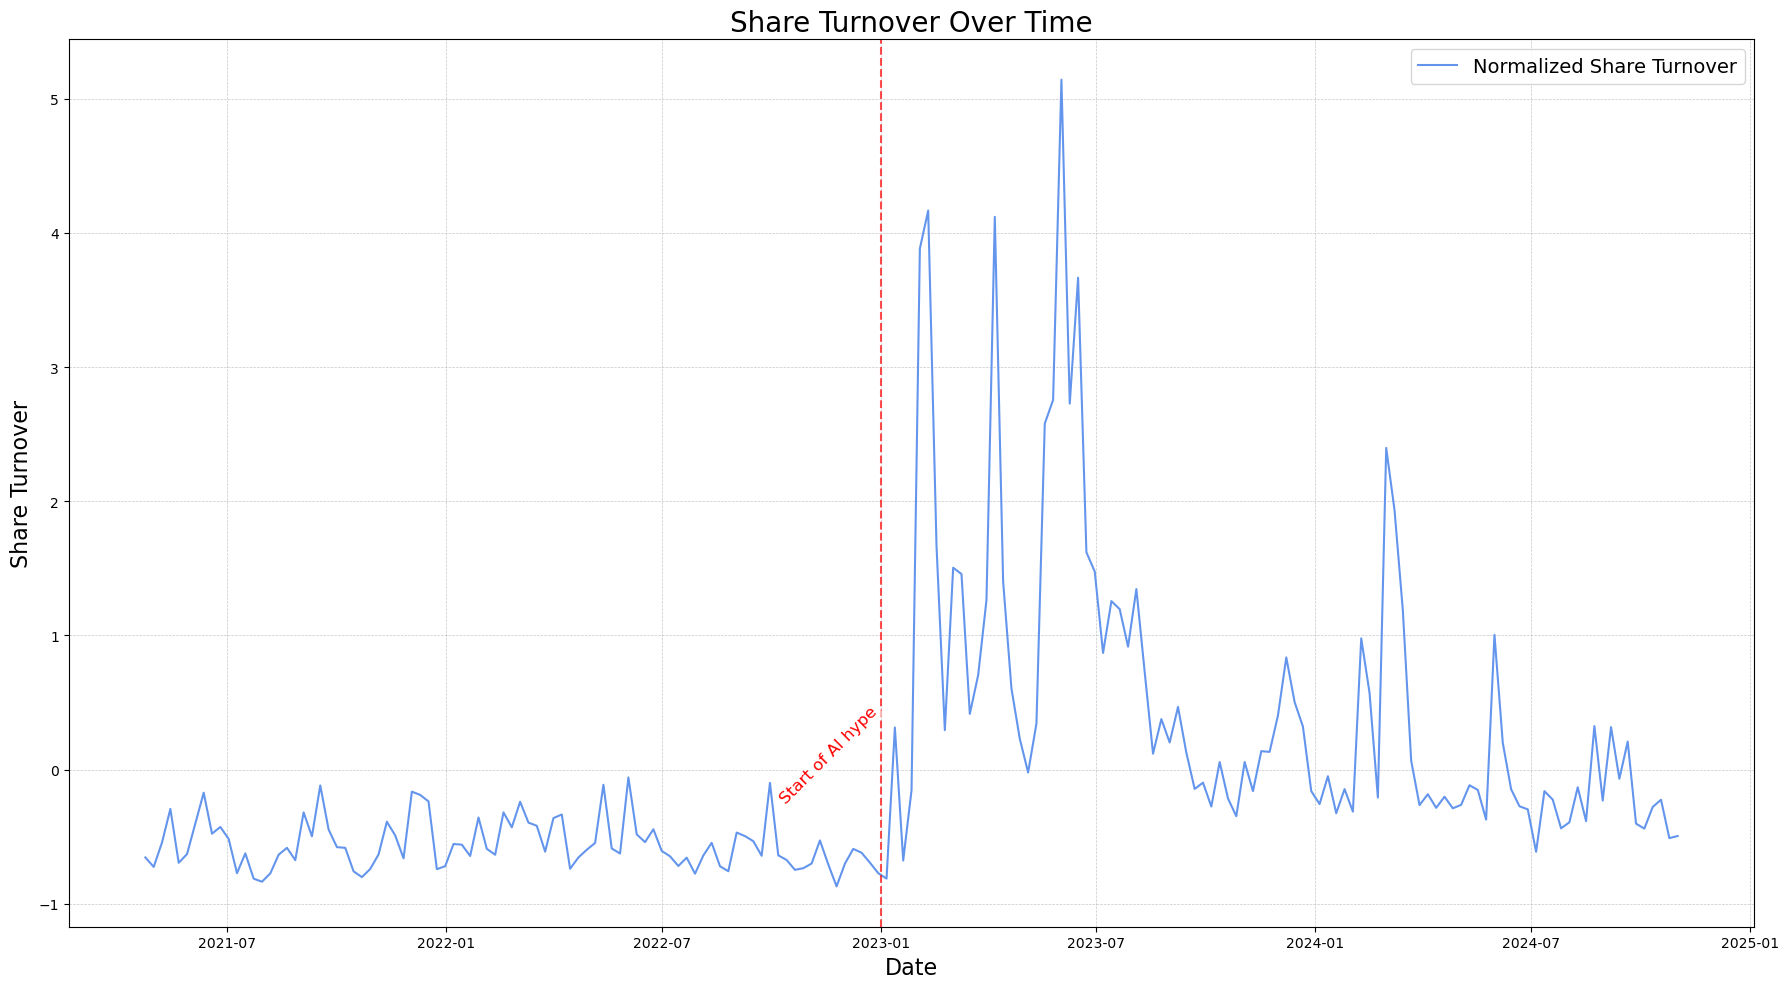

In [23]:
events = [
    ("2023-01-01", "Start of AI hype")
]

ST_main['Date'] = pd.to_datetime(ST_main['Date'])

plt.figure(figsize=(18, 10))
plt.plot(ST_main['Date'], ST_main['Normalized Share Turnover'], label='Normalized Share Turnover', color='cornflowerblue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Share Turnover', fontsize=16)
plt.title('Share Turnover Over Time', fontsize=20)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Calculate y-position for labels
turnover_min = ST_main['Normalized Share Turnover'].min()
turnover_max = ST_main['Normalized Share Turnover'].max()
label_y_turnover = turnover_min + 0.1 * (turnover_max - turnover_min)

for date_str, label in events:
    event_date = pd.to_datetime(date_str).tz_localize('UTC')
    plt.axvline(x=event_date, color='red', linestyle='--', alpha=0.7)
    plt.text(event_date, label_y_turnover, label,
             rotation=45, fontsize=12, color='red',
             ha='right', va='bottom',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=2))

plt.ylim(turnover_min - 0.05 * (turnover_max - turnover_min), turnover_max + 0.05 * (turnover_max - turnover_min))
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()